In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2

## 0. EDA och filhantering

b)

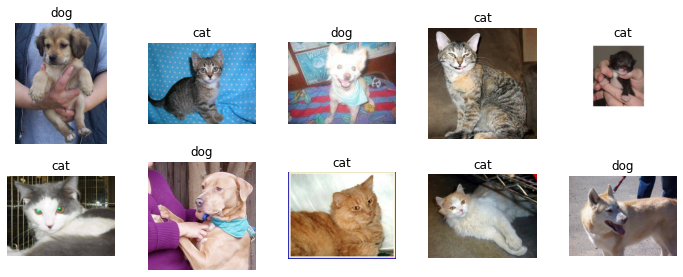

In [2]:
from dataset_split import get_filenames_from_path, gen_filename_dataframe
from image_operations import display_images

original_train_dir = os.path.abspath("./original_data/train/train")
train_pictures_filenames = get_filenames_from_path(original_train_dir)
train_pictures_one_hot = gen_filename_dataframe(train_pictures_filenames)

display_images(train_pictures_one_hot, original_train_dir)

In [3]:
train_pictures_one_hot.head()

,filename,label
0,dog.8011.jpg,0
1,cat.5077.jpg,1
2,dog.7322.jpg,0
3,cat.2718.jpg,1
4,cat.10151.jpg,1


c) Folder structure is created by running script *folder_structure.py*  

d)

In [4]:
from dataset_split import Complete_set_split_filenames

small_train_filenames, small_val_filenames, small_test_filemnames = Complete_set_split_filenames(train_pictures_one_hot, (800,200,250))
tiny_train_filenames, tiny_val_filenames, tiny_test_filemnames = Complete_set_split_filenames(train_pictures_one_hot, (80,20,25))
small_train_filenames.label.count()

1600

In [5]:
train_pictures_one_hot.shape # [0] Should decrease each time as Complete split filenames is run, as Inplace = True, thus we avoid data leakage

(22250, 2)

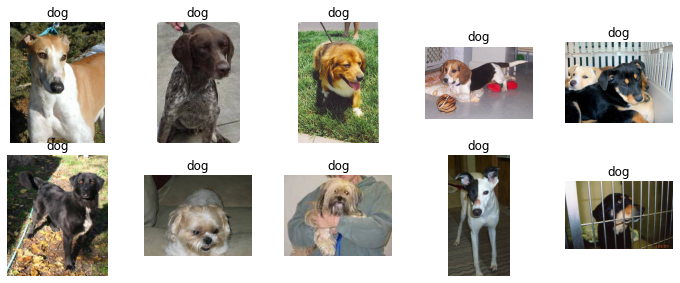

In [6]:
display_images(small_train_filenames, original_train_dir)

<AxesSubplot:xlabel='label', ylabel='count'>

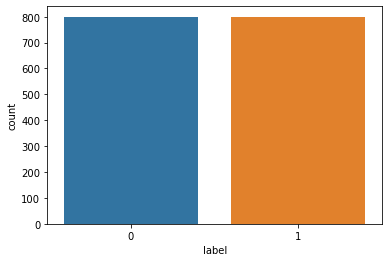

In [7]:
sns.countplot(data=small_train_filenames, x='label')

## 1. Bildbehandling

a)

In [8]:
from image_operations import extract_dimesion_distribution

sizes, oversized_pictures = extract_dimesion_distribution(small_train_filenames,original_train_dir)

oversized pictures : []


In [9]:
len(sizes), len(small_train_filenames)

(1600, 1600)

In [10]:
small_train_filenames.reset_index()

,index,filename,label
0,3518,dog.9057.jpg,0
1,23839,dog.9061.jpg,0
2,17759,dog.9943.jpg,0
3,9872,dog.11577.jpg,0
4,20154,dog.3825.jpg,0
...,...,...,...
1595,21540,cat.4821.jpg,1
1596,2808,cat.2242.jpg,1
1597,16615,cat.4516.jpg,1
1598,12194,cat.6082.jpg,1


In [11]:
img = plt.imread(f"{original_train_dir}/dog.9943.jpg")
img = cv2.resize(img, (299,299))
img.shape

(299, 299, 3)

In [12]:
dimesions_df = pd.DataFrame(sizes, columns =['height', 'width'])
train_pictures_one_hot_with_dim = pd.concat([small_train_filenames.reset_index(), dimesions_df], axis = 1)
train_pictures_one_hot_with_dim 

,index,filename,label,height,width
0,3518,dog.9057.jpg,0,499,389
1,23839,dog.9061.jpg,0,182,124
2,17759,dog.9943.jpg,0,500,334
3,9872,dog.11577.jpg,0,335,500
4,20154,dog.3825.jpg,0,360,479
...,...,...,...,...,...
1595,21540,cat.4821.jpg,1,39,60
1596,2808,cat.2242.jpg,1,287,216
1597,16615,cat.4516.jpg,1,438,248
1598,12194,cat.6082.jpg,1,269,238


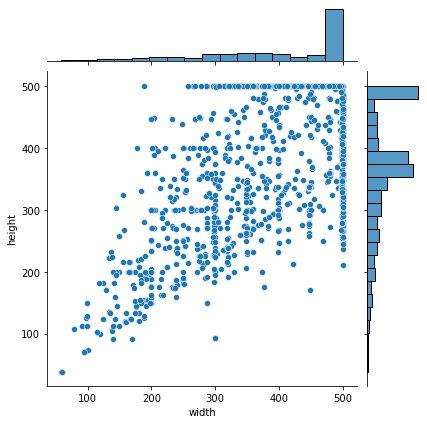

In [13]:
sns.jointplot(data=train_pictures_one_hot_with_dim, x='width', y='height')

In [14]:
train_pictures_one_hot_with_dim.query('height > 224 and width >224')

,index,filename,label,height,width
0,3518,dog.9057.jpg,0,499,389
2,17759,dog.9943.jpg,0,500,334
3,9872,dog.11577.jpg,0,335,500
4,20154,dog.3825.jpg,0,360,479
5,5492,dog.4968.jpg,0,360,300
...,...,...,...,...,...
1593,24844,cat.5907.jpg,1,374,500
1594,14552,cat.4710.jpg,1,499,400
1597,16615,cat.4516.jpg,1,438,248
1598,12194,cat.6082.jpg,1,269,238


In [15]:
too_small_pics =train_pictures_one_hot_with_dim.query('height <100 and width <100')
too_small_pics

,index,filename,label,height,width
67,23002,dog.9705.jpg,0,39,59
413,18861,dog.7459.jpg,0,71,96
1037,17589,cat.8138.jpg,1,71,95
1595,21540,cat.4821.jpg,1,39,60


In [16]:
train_pictures_filenames_cleaned = train_pictures_one_hot_with_dim.drop(too_small_pics.index, axis = 0)
train_pictures_filenames_cleaned

,index,filename,label,height,width
0,3518,dog.9057.jpg,0,499,389
1,23839,dog.9061.jpg,0,182,124
2,17759,dog.9943.jpg,0,500,334
3,9872,dog.11577.jpg,0,335,500
4,20154,dog.3825.jpg,0,360,479
...,...,...,...,...,...
1594,14552,cat.4710.jpg,1,499,400
1596,2808,cat.2242.jpg,1,287,216
1597,16615,cat.4516.jpg,1,438,248
1598,12194,cat.6082.jpg,1,269,238


In [17]:
from image_operations import read_and_resize_images
data = read_and_resize_images(train_pictures_filenames_cleaned, original_train_dir,(299,299))

In [18]:
data.shape

(1596, 299, 299, 3)

(374, 500, 3)
(187, 250, 3)


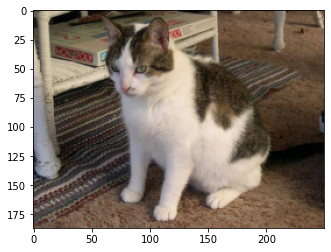

In [19]:
image = plt.imread(f"{original_train_dir}/cat.5682.jpg")
resize_factor = .5
print(image.shape)
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor)

image = cv2.resize(image, new_size)
plt.imshow(image)
print(image.shape)

In [20]:
biggies = [img for img in sizes if img[0] > 700]
squares = [img for img in sizes if img[0] == img[1]]
len(squares)
print(f"ratio squares : {len(squares)/len(sizes)}")

ratio squares : 0.00125
